# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm

# Wizualizacja danych

In [2]:
# read data
data = pd.read_csv("penguins_size.csv")

# select columns
kmeans = pd.DataFrame(data, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
kmeans.info()

# count NaN
print(kmeans.isnull().sum().sum())

# print head
kmeans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.9 KB
8


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [3]:
# delete NaN's
kmeans = kmeans.dropna()

# count NaN again
print(kmeans.isnull().sum().sum())

# print head
kmeans.head()

0


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


## Wykresy 2D - każda kolumna z każdą

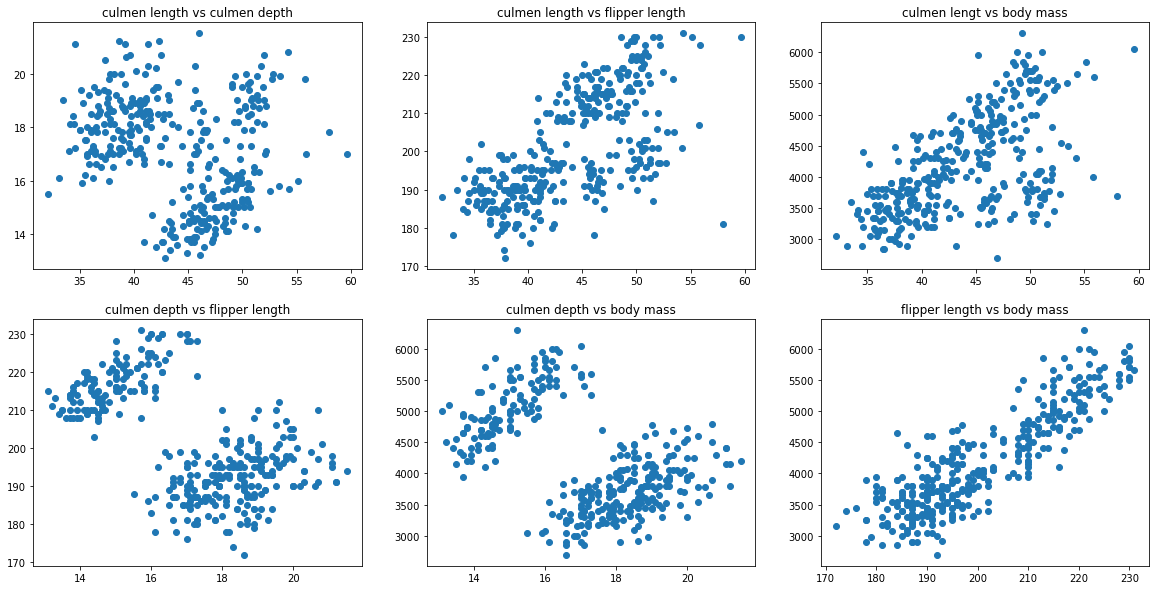

In [4]:
# column to column plots

# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 3)

# set size of the plot
figure.set_figwidth(20)
figure.set_figheight(10)
  
# For 'culmen_length_mm' vs 'culmen_depth_mm' 
axis[0, 0].scatter(kmeans['culmen_length_mm'],kmeans['culmen_depth_mm']) 
axis[0, 0].set_title("culmen length vs culmen depth") 
  
# For 'culmen_length_mm' vs 'flipper_length_mm'
axis[0, 1].scatter(kmeans['culmen_length_mm'],kmeans['flipper_length_mm']) 
axis[0, 1].set_title("culmen length vs flipper length")  
  
# For 'culmen_length_mm' vs 'body_mass_g'
axis[0, 2].scatter(kmeans['culmen_length_mm'],kmeans['body_mass_g']) 
axis[0, 2].set_title("culmen lengt vs body mass")  
  
# For 'culmen_depth_mm' vs 'flipper_length_mm' 
axis[1, 0].scatter(kmeans['culmen_depth_mm'],kmeans['flipper_length_mm']) 
axis[1, 0].set_title("culmen depth vs flipper length")

# For 'culmen_depth_mm' vs 'body_mass_g'
axis[1, 1].scatter(kmeans['culmen_depth_mm'],kmeans['body_mass_g']) 
axis[1, 1].set_title("culmen depth vs body mass")  
  
# For 'flipper_length_mm' vs 'body_mass_g' 
axis[1, 2].scatter(kmeans['flipper_length_mm'],kmeans['body_mass_g']) 
axis[1, 2].set_title("flipper length vs body mass")
  
# Combine all the operations and display
plt.show() 

In [5]:
# normalize the data

# copy the data 
df_min_max_scaled = kmeans.copy() 
  
# apply normalization techniques 
for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     

# view normalized data
print(df_min_max_scaled)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0            0.254545         0.666667           0.152542     0.291667
1            0.269091         0.511905           0.237288     0.305556
2            0.298182         0.583333           0.389831     0.152778
4            0.167273         0.738095           0.355932     0.208333
5            0.261818         0.892857           0.305085     0.263889
..                ...              ...                ...          ...
338          0.549091         0.071429           0.711864     0.618056
340          0.534545         0.142857           0.728814     0.597222
341          0.665455         0.309524           0.847458     0.847222
342          0.476364         0.202381           0.677966     0.694444
343          0.647273         0.357143           0.694915     0.750000

[342 rows x 4 columns]


## Wykresy 2D - każda kolumna z każdą po normalizacji

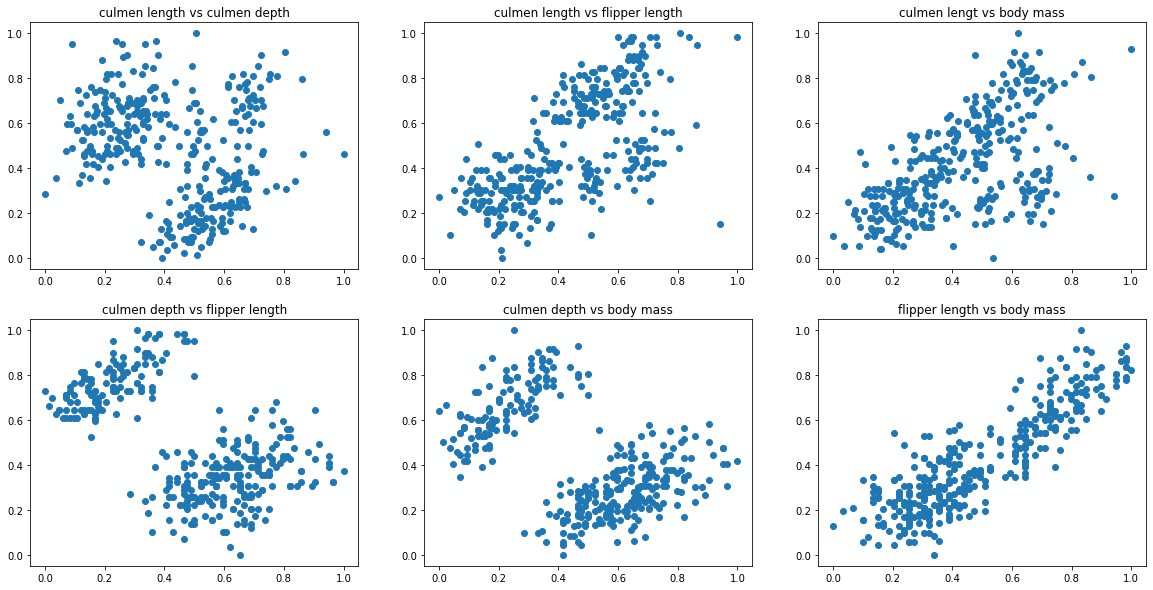

In [6]:
# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 3)

# set size of the plot
figure.set_figwidth(20)
figure.set_figheight(10)
  
# For 'culmen_length_mm' vs 'culmen_depth_mm' 
axis[0, 0].scatter(df_min_max_scaled['culmen_length_mm'],df_min_max_scaled['culmen_depth_mm']) 
axis[0, 0].set_title("culmen length vs culmen depth") 
  
# For 'culmen_length_mm' vs 'flipper_length_mm'
axis[0, 1].scatter(df_min_max_scaled['culmen_length_mm'],df_min_max_scaled['flipper_length_mm']) 
axis[0, 1].set_title("culmen length vs flipper length")  
  
# For 'culmen_length_mm' vs 'body_mass_g'
axis[0, 2].scatter(df_min_max_scaled['culmen_length_mm'],df_min_max_scaled['body_mass_g']) 
axis[0, 2].set_title("culmen lengt vs body mass") 
  
# For 'culmen_depth_mm' vs 'flipper_length_mm' 
axis[1, 0].scatter(df_min_max_scaled['culmen_depth_mm'],df_min_max_scaled['flipper_length_mm']) 
axis[1, 0].set_title("culmen depth vs flipper length")

# For 'culmen_depth_mm' vs 'body_mass_g'
axis[1, 1].scatter(df_min_max_scaled['culmen_depth_mm'],df_min_max_scaled['body_mass_g']) 
axis[1, 1].set_title("culmen depth vs body mass")   
  
# For 'flipper_length_mm' vs 'body_mass_g' 
axis[1, 2].scatter(df_min_max_scaled['flipper_length_mm'],df_min_max_scaled['body_mass_g']) 
axis[1, 2].set_title("flipper length vs body mass")
  
# Combine all the operations and display
plt.show() 

## wykres WCSS

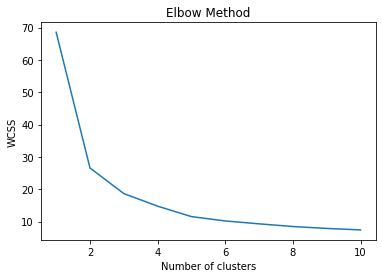

In [7]:
# Elbow method
wcss = []
for i in range(1, 11):
                k_means = KMeans(n_clusters = i, init = 'k-means++', 
                                                    random_state = 42)
                k_means.fit(df_min_max_scaled)
                wcss.append(k_means.inertia_)
                
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Wykresy 2D - każda kolumna z każdą po normalizacji z centroidami dla k=3

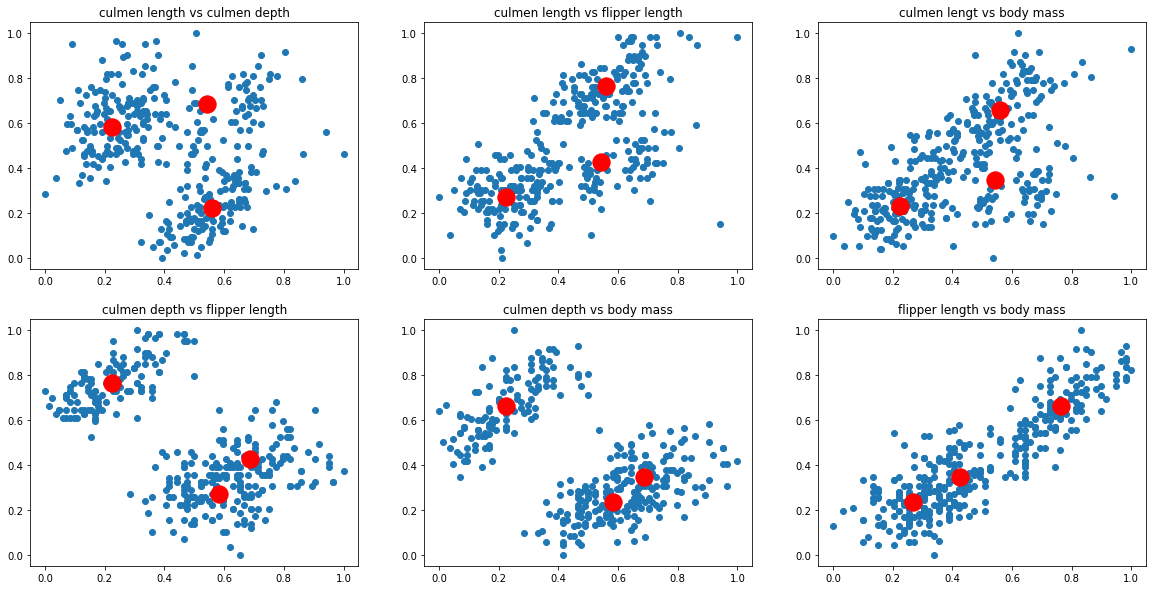

In [8]:
# train model for k=3

k_means = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = k_means.fit_predict(df_min_max_scaled)

# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 3)

# set size of the plot
figure.set_figwidth(20)
figure.set_figheight(10)
  
# For 'culmen_length_mm' vs 'culmen_depth_mm' 
axis[0, 0].scatter(df_min_max_scaled['culmen_length_mm'],df_min_max_scaled['culmen_depth_mm'])
axis[0, 0].scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=300, c='red')
axis[0, 0].set_title("culmen length vs culmen depth")
  
# For 'culmen_length_mm' vs 'flipper_length_mm'
axis[0, 1].scatter(df_min_max_scaled['culmen_length_mm'],df_min_max_scaled['flipper_length_mm']) 
axis[0, 1].scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 2], s=300, c='red')
axis[0, 1].set_title("culmen length vs flipper length")   
  
# For 'culmen_length_mm' vs 'body_mass_g'
axis[0, 2].scatter(df_min_max_scaled['culmen_length_mm'],df_min_max_scaled['body_mass_g'])
axis[0, 2].scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 3], s=300, c='red')
axis[0, 2].set_title("culmen lengt vs body mass")  
  
# For 'culmen_depth_mm' vs 'flipper_length_mm' 
axis[1, 0].scatter(df_min_max_scaled['culmen_depth_mm'],df_min_max_scaled['flipper_length_mm'])
axis[1, 0].scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], s=300, c='red')
axis[1, 0].set_title("culmen depth vs flipper length")

# For 'culmen_depth_mm' vs 'body_mass_g'
axis[1, 1].scatter(df_min_max_scaled['culmen_depth_mm'],df_min_max_scaled['body_mass_g'])
axis[1, 1].scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 3], s=300, c='red')
axis[1, 1].set_title("culmen depth vs body mass")   
  
# For 'flipper_length_mm' vs 'body_mass_g' 
axis[1, 2].scatter(df_min_max_scaled['flipper_length_mm'],df_min_max_scaled['body_mass_g'])
axis[1, 2].scatter(k_means.cluster_centers_[:, 2], k_means.cluster_centers_[:, 3], s=300, c='red')
axis[1, 2].set_title("flipper length vs body mass")
  
# Combine all the operations and display
plt.show() 

In [9]:
# Add cluster column
df_min_max_scaled.insert(4, 'cluster', pred_y)
df_min_max_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,0.254545,0.666667,0.152542,0.291667,0
1,0.269091,0.511905,0.237288,0.305556,0
2,0.298182,0.583333,0.389831,0.152778,0
4,0.167273,0.738095,0.355932,0.208333,0
5,0.261818,0.892857,0.305085,0.263889,0


## Wykresy 2D - każda kolumna z każdą po normalizacji pokolorowana względem przypisanego klastra dla k=3

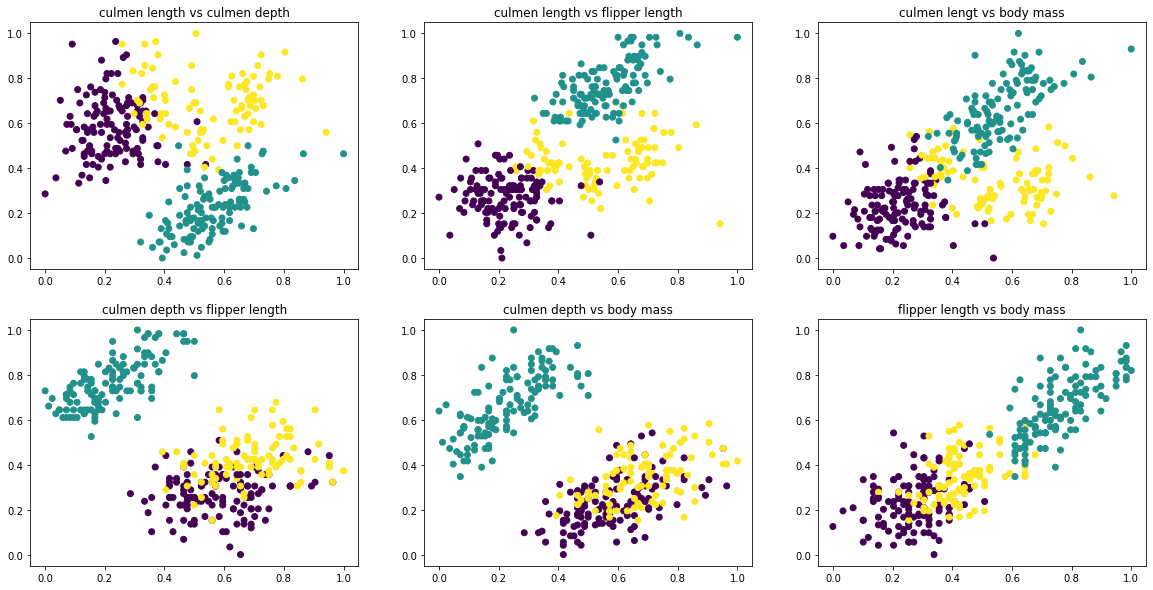

In [10]:
# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 3)

# set size of the plot
figure.set_figwidth(20)
figure.set_figheight(10)
  
# For 'culmen_length_mm' vs 'culmen_depth_mm' 
axis[0, 0].scatter(df_min_max_scaled['culmen_length_mm'], df_min_max_scaled['culmen_depth_mm'], c = df_min_max_scaled['cluster']) 
axis[0, 0].set_title("culmen length vs culmen depth") 

# For 'culmen_length_mm' vs 'flipper_length_mm'
axis[0, 1].scatter(df_min_max_scaled['culmen_length_mm'], df_min_max_scaled['flipper_length_mm'], c = df_min_max_scaled['cluster']) 
axis[0, 1].set_title("culmen length vs flipper length")    
  
# For 'culmen_length_mm' vs 'body_mass_g'
axis[0, 2].scatter(df_min_max_scaled['culmen_length_mm'], df_min_max_scaled['body_mass_g'], c = df_min_max_scaled['cluster']) 
axis[0, 2].set_title("culmen lengt vs body mass") 
  
# For 'culmen_depth_mm' vs 'flipper_length_mm' 
axis[1, 0].scatter(df_min_max_scaled['culmen_depth_mm'], df_min_max_scaled['flipper_length_mm'], c = df_min_max_scaled['cluster']) 
axis[1, 0].set_title("culmen depth vs flipper length")

# For 'culmen_depth_mm' vs 'body_mass_g'
axis[1, 1].scatter(df_min_max_scaled['culmen_depth_mm'], df_min_max_scaled['body_mass_g'], c = df_min_max_scaled['cluster']) 
axis[1, 1].set_title("culmen depth vs body mass")  
  
# For 'flipper_length_mm' vs 'body_mass_g' 
axis[1, 2].scatter(df_min_max_scaled['flipper_length_mm'], df_min_max_scaled['body_mass_g'], c = df_min_max_scaled['cluster']) 
axis[1, 2].set_title("flipper length vs body mass")
  
# Combine all the operations and display
plt.show() 

## Wykresy 2D - każda kolumna z każdą po normalizacji z centroidami dla k=2

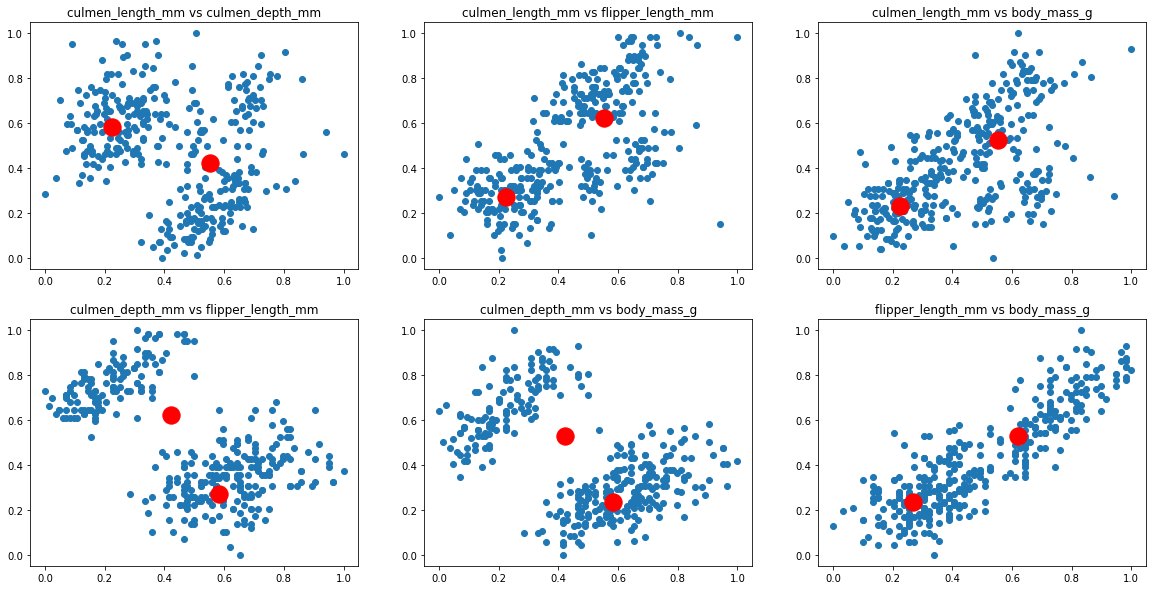

In [11]:
# train model for k=2

k_means = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
pred_y = k_means.fit_predict(df_min_max_scaled)

# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 3)

# set size of the plot
figure.set_figwidth(20)
figure.set_figheight(10)
  
# For 'culmen_length_mm' vs 'culmen_depth_mm' 
axis[0, 0].scatter(df_min_max_scaled['culmen_length_mm'],df_min_max_scaled['culmen_depth_mm'])
axis[0, 0].scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=300, c='red')
axis[0, 0].set_title("culmen_length_mm vs culmen_depth_mm") 
  
# For 'culmen_length_mm' vs 'flipper_length_mm'
axis[0, 1].scatter(df_min_max_scaled['culmen_length_mm'],df_min_max_scaled['flipper_length_mm']) 
axis[0, 1].scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 2], s=300, c='red')
axis[0, 1].set_title("culmen_length_mm vs flipper_length_mm")  
  
# For 'culmen_length_mm' vs 'body_mass_g'
axis[0, 2].scatter(df_min_max_scaled['culmen_length_mm'],df_min_max_scaled['body_mass_g'])
axis[0, 2].scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 3], s=300, c='red')
axis[0, 2].set_title("culmen_length_mm vs body_mass_g")  
  
# For 'culmen_depth_mm' vs 'flipper_length_mm' 
axis[1, 0].scatter(df_min_max_scaled['culmen_depth_mm'],df_min_max_scaled['flipper_length_mm'])
axis[1, 0].scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], s=300, c='red')
axis[1, 0].set_title("culmen_depth_mm vs flipper_length_mm")

# For 'culmen_depth_mm' vs 'body_mass_g'
axis[1, 1].scatter(df_min_max_scaled['culmen_depth_mm'],df_min_max_scaled['body_mass_g'])
axis[1, 1].scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 3], s=300, c='red')
axis[1, 1].set_title("culmen_depth_mm vs body_mass_g")  
  
# For 'flipper_length_mm' vs 'body_mass_g' 
axis[1, 2].scatter(df_min_max_scaled['flipper_length_mm'],df_min_max_scaled['body_mass_g'])
axis[1, 2].scatter(k_means.cluster_centers_[:, 2], k_means.cluster_centers_[:, 3], s=300, c='red')
axis[1, 2].set_title("flipper_length_mm vs body_mass_g")
  
# Combine all the operations and display
plt.show() 

In [12]:
# Add cluster column
del df_min_max_scaled['cluster']
df_min_max_scaled.insert(4, 'cluster', pred_y)
df_min_max_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster
0,0.254545,0.666667,0.152542,0.291667,0
1,0.269091,0.511905,0.237288,0.305556,0
2,0.298182,0.583333,0.389831,0.152778,0
4,0.167273,0.738095,0.355932,0.208333,0
5,0.261818,0.892857,0.305085,0.263889,0


## Wykresy 2D - każda kolumna z każdą po normalizacji pokolorowana względem przypisanego klastra dla k=2

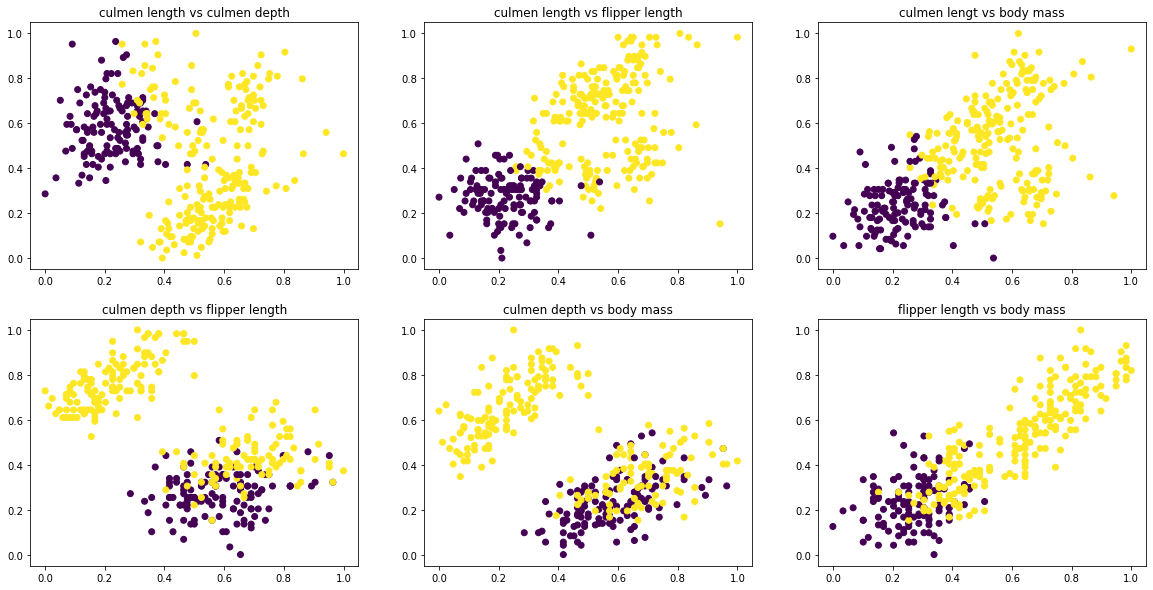

In [13]:
# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 3)

# set size of the plot
figure.set_figwidth(20)
figure.set_figheight(10)
  
# For 'culmen_length_mm' vs 'culmen_depth_mm' 
axis[0, 0].scatter(df_min_max_scaled['culmen_length_mm'], df_min_max_scaled['culmen_depth_mm'], c = df_min_max_scaled['cluster']) 
axis[0, 0].set_title("culmen length vs culmen depth") 
  
# For 'culmen_length_mm' vs 'flipper_length_mm'
axis[0, 1].scatter(df_min_max_scaled['culmen_length_mm'], df_min_max_scaled['flipper_length_mm'], c = df_min_max_scaled['cluster']) 
axis[0, 1].set_title("culmen length vs flipper length")   
  
# For 'culmen_length_mm' vs 'body_mass_g'
axis[0, 2].scatter(df_min_max_scaled['culmen_length_mm'], df_min_max_scaled['body_mass_g'], c = df_min_max_scaled['cluster']) 
axis[0, 2].set_title("culmen lengt vs body mass")   
  
# For 'culmen_depth_mm' vs 'flipper_length_mm' 
axis[1, 0].scatter(df_min_max_scaled['culmen_depth_mm'], df_min_max_scaled['flipper_length_mm'], c = df_min_max_scaled['cluster']) 
axis[1, 0].set_title("culmen depth vs flipper length")

# For 'culmen_depth_mm' vs 'body_mass_g'
axis[1, 1].scatter(df_min_max_scaled['culmen_depth_mm'], df_min_max_scaled['body_mass_g'], c = df_min_max_scaled['cluster']) 
axis[1, 1].set_title("culmen depth vs body mass")   
  
# For 'flipper_length_mm' vs 'body_mass_g' 
axis[1, 2].scatter(df_min_max_scaled['flipper_length_mm'], df_min_max_scaled['body_mass_g'], c = df_min_max_scaled['cluster']) 
axis[1, 2].set_title("flipper length vs body mass")
  
# Combine all the operations and display
plt.show() 

# Klasyfikacja

In [14]:
def KMEANS(X, Y):
    # split data
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

    # train kmeans and classify
    k_means = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
    k_means.fit(x_train)
    train_pred = k_means.predict(x_train)
    test_pred = k_means.predict(x_test)

    # create test table
    Test = x_test.join(y_test)
    Test['test_pred'] = test_pred

    # create train table
    Train = x_train.join(y_train)
    Train['train_pred'] = train_pred

    # split the train table by species
    gentoo = Train.loc[Train['species'] == 'Gentoo']
    adelie = Train.loc[Train['species'] == 'Adelie']
    chinstrap = Train.loc[Train['species'] == 'Chinstrap']

    # find out which cluster is which species from train table
    gentoo_cluster = gentoo['train_pred'].value_counts().idxmax()
    adelie_cluster = adelie['train_pred'].value_counts().idxmax()
    chinstrap_cluster = chinstrap['train_pred'].value_counts().idxmax()

    # get the corectly classified penguins from test table
    positive_gentoo = Test[(Test['species'] == 'Gentoo') & (Test['test_pred'] == gentoo_cluster)]
    positive_adelie = Test[(Test['species'] == 'Adelie') & (Test['test_pred'] == adelie_cluster)]
    positive_chinstrap = Test[(Test['species'] == 'Chinstrap') & (Test['test_pred'] == chinstrap_cluster)]

    # count corectly classified penguins
    positive = (len(positive_gentoo) + len(positive_adelie) + len(positive_chinstrap))/len(T)
    #print("procent \"poprawnie\" sklasyfikowanych pingwinów = ", round(positive,4)*100, "%")
    
    return round(positive,6)*100

In [22]:
# load data
data = pd.read_csv("penguins_size.csv")
data = pd.DataFrame(data, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species'])
data = data.dropna()

X = pd.DataFrame(data, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

Y = pd.DataFrame(data, columns = ['species'])

# normalize
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())


wyniki_kmeans = []
for i in tqdm(range(100)):
    wyniki_kmeans.append(KMEANS(X, Y))
    
print(f"Średni wynik = {np.mean(wyniki_kmeans)} %")
print(f"Maksymalny wynik = {np.amax(wyniki_kmeans)} %")
print(f"Minimalny wynik = {np.amin(wyniki_kmeans)} %")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 35.63it/s]


Średni wynik = 88.84466200000003 %
Maksymalny wynik = 94.1748 %
Minimalny wynik = 82.5243 %
